In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Pretty display for notebooks
%matplotlib inline

# Data Preparation

In [2]:
# Load the Johns Hopkins dataset
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
country_df = country_df.rename(columns={'Last_Update':'date','Country_Region':'country','Lat':'lat','Long_':'long',
                                        'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','ISO3':'iso3'})
country_df = country_df[['date','country','iso3','lat','long','confirmed','deaths','recovered']]
#print(country_df.info())

In [4]:
country_df.head()

,date,country,iso3,lat,long,confirmed,deaths,recovered
0,2021-09-01 11:21:32,Afghanistan,AFG,33.93911,67.709953,153220,7118,NaN
1,2021-09-01 11:21:32,Albania,ALB,41.15330,20.168300,146387,2498,NaN
2,2021-09-01 11:21:32,Algeria,DZA,28.03390,1.659600,196080,5269,NaN
3,2021-09-01 11:21:32,Andorra,AND,42.50630,1.521800,15033,130,NaN
4,2021-09-01 11:21:32,Angola,AGO,-11.20270,17.873900,47544,1217,NaN


In [6]:
# Load the Risk Factors dataset 
risk_df = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\01_Global\covid19_global_v3.xlsx')
print(risk_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 37 columns):
country                179 non-null object
iso3                   179 non-null object
region                 179 non-null object
sub_region             179 non-null object
population             179 non-null int64
pop_male               177 non-null float64
pop_female             177 non-null float64
pop_14under            172 non-null float64
pop_60over             172 non-null float64
density                172 non-null float64
gdp                    179 non-null float64
tour_expenditure       171 non-null float64
tourist_arrivals       171 non-null float64
air_passengers         177 non-null float64
lung                   171 non-null float64
pneumonia              171 non-null float64
asthma                 171 non-null float64
hiv                    177 non-null float64
unsafe_water           172 non-null float64
poor_sanitation        172 non-null float64
no_handwashing       

In [7]:
df = pd.merge(country_df, risk_df, how='inner', on='iso3') 
df = df.rename(columns={'country_x':'country'})
df = df.drop('country_y', axis=1)
#df.head()
#print(df.info())
#df.isnull().sum()

In [8]:
# make new_variable
df['confirmed_rate'] = df['confirmed']/df['population']
df['deaths_rate'] = df['deaths']/df['confirmed']
df['confirmed_group'] = pd.qcut(df['confirmed'], q=4, labels=False, precision=0)

# USA exclude
#df = df.loc[df['iso3']!='USA']

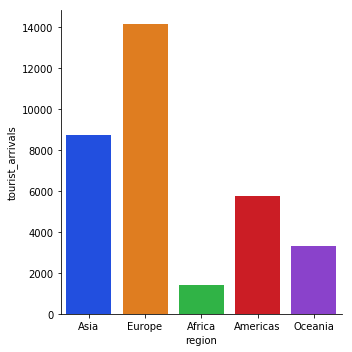

In [9]:
sns.catplot(data=df, x="region", y="tourist_arrivals", kind="bar", palette="bright", ci=None)

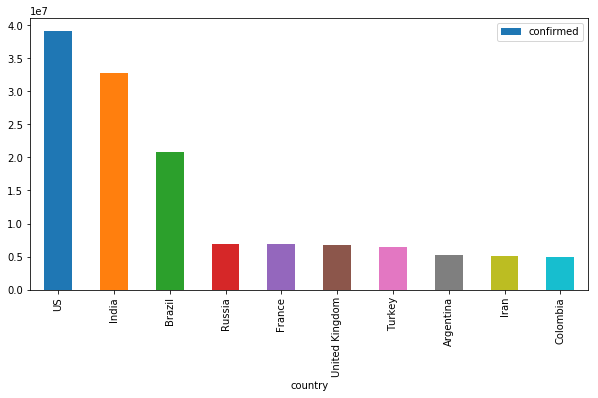

In [10]:
temp=df.sort_values(['confirmed'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= 'confirmed', kind = 'bar',  ax = ax)   

In [11]:
###########################################################################
# As ML package cannot handle string variable, 
# so we need to change to numeric variable by Label Encoding 
###########################################################################

from sklearn.preprocessing import LabelEncoder

cat_data = df['region']
le = LabelEncoder()
le.fit_transform(cat_data)
df['region'] = le.transform(cat_data)

cat_data = df['sub_region']
le = LabelEncoder()
le.fit_transform(cat_data)
df['sub_region'] = le.transform(cat_data)

df['region'] = df['region'].astype("category")
df['sub_region'] = df['sub_region'].astype("category")

df.head()

,date,country,iso3,lat,long,confirmed,deaths,recovered,region,sub_region,...,nurses_midwives,pharmacists,physicians,hospital_beds,temperature,co2_emissions,pm25,confirmed_rate,deaths_rate,confirmed_group
0,2021-09-01 11:21:32,Afghanistan,AFG,33.93911,67.709953,153220,7118,NaN,2,10,...,0.0,0.0,0.3,0.5,4.62586,0.293946,57.990394,0.004122,0.046456,1
1,2021-09-01 11:21:32,Albania,ALB,41.15330,20.168300,146387,2498,NaN,3,11,...,3.6,0.0,1.2,2.9,2.26611,1.978763,15.373139,0.051070,0.017064,1
2,2021-09-01 11:21:32,Algeria,DZA,28.03390,1.659600,196080,5269,NaN,0,6,...,2.2,0.0,1.8,1.9,14.34830,3.735520,35.782437,0.004643,0.026872,2
3,2021-09-01 11:21:32,Andorra,AND,42.50630,1.521800,15033,130,NaN,3,11,...,NaN,NaN,NaN,2.5,5.63983,5.832906,10.818700,0.195219,0.008648,0
4,2021-09-01 11:21:32,Angola,AGO,-11.20270,17.873900,47544,1217,NaN,0,12,...,0.0,0.0,0.2,0.8,23.69420,1.290307,35.786666,0.001543,0.025597,1


In [12]:
gr0 = df.loc[df['confirmed_group'] == 0]
gr1 = df.loc[df['confirmed_group'] == 1]
gr2 = df.loc[df['confirmed_group'] == 2]
gr3 = df.loc[df['confirmed_group'] == 3]

C:\Users\totot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\totot\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\totot\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


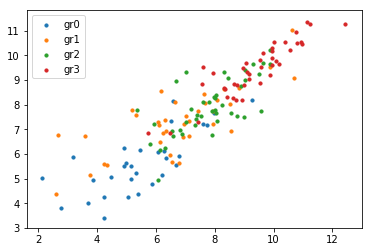

In [13]:
# plots
plt.scatter(np.log(gr0[['tour_expenditure']]), np.log(gr0[['tourist_arrivals']]), s=10, label='gr0')
plt.scatter(np.log(gr1[['tour_expenditure']]), np.log(gr1[['tourist_arrivals']]), s=10, label='gr1')
plt.scatter(np.log(gr2[['tour_expenditure']]), np.log(gr2[['tourist_arrivals']]), s=10, label='gr2')
plt.scatter(np.log(gr3[['tour_expenditure']]), np.log(gr3[['tourist_arrivals']]), s=10, label='gr3')

plt.legend()
plt.show()

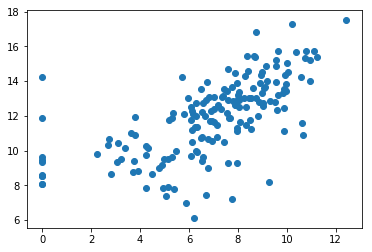

In [14]:
plt.scatter(np.log1p(df[['tour_expenditure']]), np.log1p(df[['confirmed']]))

In [15]:
temp=df[['confirmed','population', 'pop_male', 'pop_female',
       'pop_14under', 'pop_60over', 'density', 'gdp',
       'tour_expenditure', 'tourist_arrivals', 'air_passengers', 'lung',
       'pneumonia', 'asthma', 'hiv', 'unsafe_water', 'poor_sanitation',
       'no_handwashing', 'alcohol_use', 'drug_use', 'high_blood_sugar',
       'high_cholesterol', 'obesity', 'high_blood_pressure', 'smoking',
         'temperature', 'co2_emissions', 'pm25']]
temp = temp.dropna()

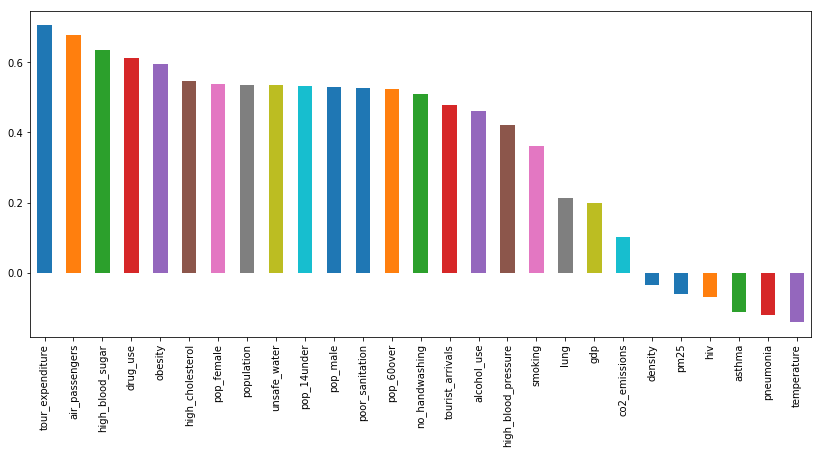

In [16]:
#Correlation between confirmed and the other numeric features

corr_with_confirmed = temp.corr()["confirmed"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_confirmed.drop("confirmed").plot.bar()
plt.show()


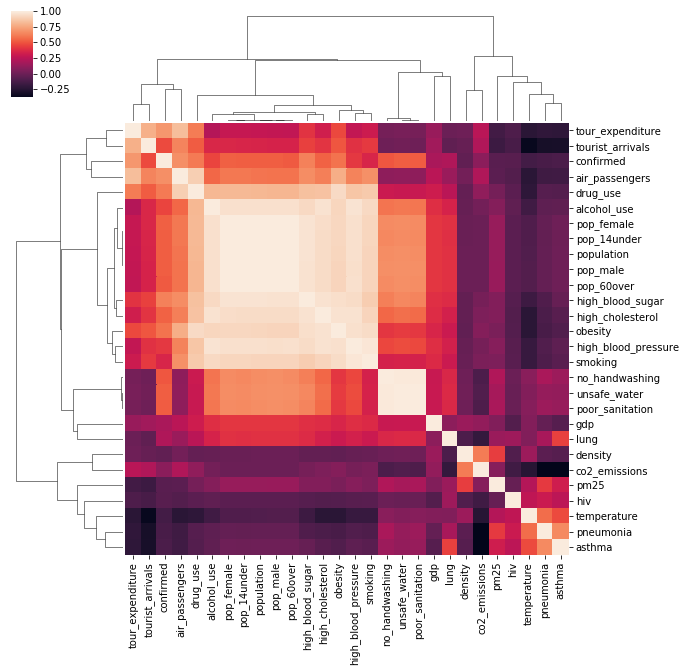

In [17]:
# cluster map

cluster = sns.clustermap(temp.corr())
plt.setp(cluster.ax_heatmap.get_xticklabels(), rotation=90) 
plt.show()

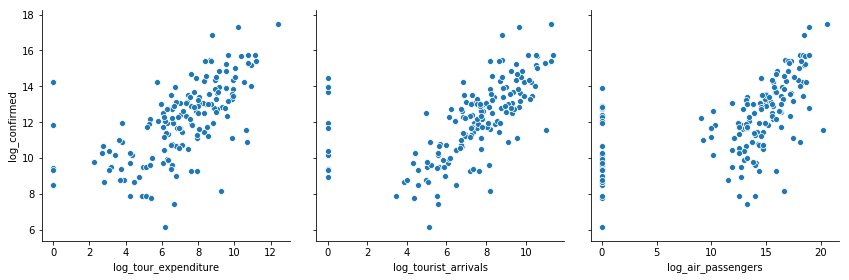

In [18]:
temp['log_tour_expenditure'] = np.log1p(temp['tour_expenditure'])
temp['log_tourist_arrivals'] = np.log1p(temp['tourist_arrivals'])
temp['log_air_passengers'] = np.log1p(temp['air_passengers'])
temp['log_confirmed'] = np.log1p(temp['confirmed'])

g = sns.PairGrid(temp, y_vars=["log_confirmed"], x_vars=["log_tour_expenditure", "log_tourist_arrivals","log_air_passengers"], height=4)
g.map(sns.scatterplot)

# Explore Features

### Target feature distribution

In [19]:
# assign target features
y = temp.iloc[:,0]
y_trans = np.log1p(y)

The skewness of target variable is 6.693500011637221


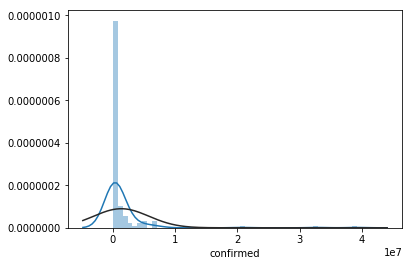

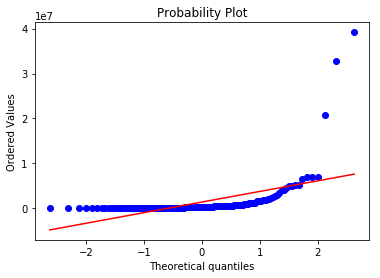

In [20]:
#histogram and normal probability plot
#skewness
from scipy.stats import norm

sns.distplot(y, fit=norm);
print("The skewness of target variable is {}".format(y.skew()))

fig = plt.figure()
res = stats.probplot(y, plot=plt)

The skewness of target variable is -0.13685425925639452


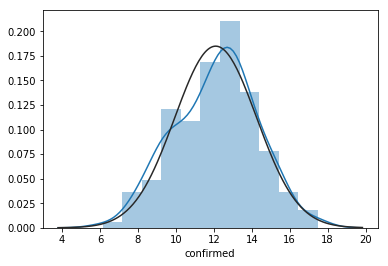

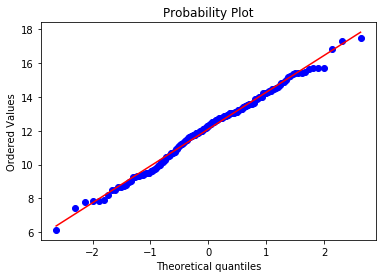

In [21]:
#histogram and normal probability plot
#skewness

from scipy.stats import norm
sns.distplot(y_trans, fit=norm);
print("The skewness of target variable is {}".format(y_trans.skew()))

fig = plt.figure()
res = stats.probplot(y_trans, plot=plt)

# Split Train & Test Data

In [22]:
df.columns

Index(['date', 'country', 'iso3', 'lat', 'long', 'confirmed', 'deaths',
       'recovered', 'region', 'sub_region', 'population', 'pop_male',
       'pop_female', 'pop_14under', 'pop_60over', 'density', 'gdp',
       'tour_expenditure', 'tourist_arrivals', 'air_passengers', 'lung',
       'pneumonia', 'asthma', 'hiv', 'unsafe_water', 'poor_sanitation',
       'no_handwashing', 'alcohol_use', 'drug_use', 'high_blood_sugar',
       'high_cholesterol', 'obesity', 'high_blood_pressure', 'smoking',
       'special_hospitals', 'hospitals', 'nurses_midwives', 'pharmacists',
       'physicians', 'hospital_beds', 'temperature', 'co2_emissions', 'pm25',
       'confirmed_rate', 'deaths_rate', 'confirmed_group'],
      dtype='object')

In [23]:
df_new = df[['confirmed', 'region', 'population', 'pop_male', 'pop_female',
       'pop_14under', 'pop_60over', 'density', 'gdp', 'tour_expenditure',
       'tourist_arrivals', 'air_passengers', 'lung', 'pneumonia', 'asthma',
       'hiv', 'unsafe_water', 'poor_sanitation', 'no_handwashing',
       'alcohol_use', 'drug_use', 'high_blood_sugar', 'high_cholesterol',
       'obesity', 'high_blood_pressure', 'smoking', 'temperature', 'co2_emissions', 'pm25']]
             

# fill missing data with 0
df_new = df_new.fillna(0)

#print(df_new.info())


In [24]:
# Fianl target variables
y = df_new.iloc[:,0]
y = np.log1p(y)

# X dataframe
X = df_new.iloc[:, 1: ]
X.columns

Index(['region', 'population', 'pop_male', 'pop_female', 'pop_14under',
       'pop_60over', 'density', 'gdp', 'tour_expenditure', 'tourist_arrivals',
       'air_passengers', 'lung', 'pneumonia', 'asthma', 'hiv', 'unsafe_water',
       'poor_sanitation', 'no_handwashing', 'alcohol_use', 'drug_use',
       'high_blood_sugar', 'high_cholesterol', 'obesity',
       'high_blood_pressure', 'smoking', 'temperature', 'co2_emissions',
       'pm25'],
      dtype='object')

In [25]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Random Forest Regression Train Model

In [27]:
#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf = RandomForestRegressor()

#Train the model on training data
rf.fit(X_train, y_train)

C:\Users\totot\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# Make Prediction & Evaluation

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
score = rf.score(X_train,y_train)

print ("R2 of Random Forest Regression:", score)
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

R2 of Random Forest Regression: 0.9585967185728724
MAE:  0.8803709535169104
MSE:  1.5287236468664391
RMSE: 1.2364156448648
RMSLE: 0.11140090439544219


Text(0.5,0,'Relative Importance')

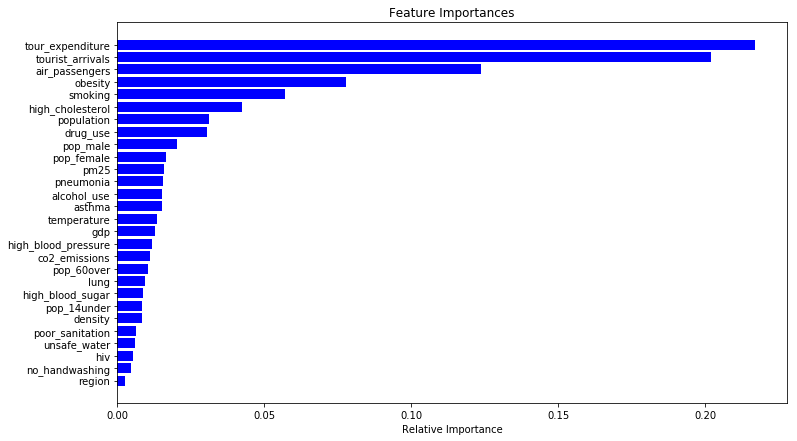

In [29]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [30]:
# Define feature_list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tour_expenditure     Importance: 0.22
Variable: tourist_arrivals     Importance: 0.2
Variable: air_passengers       Importance: 0.12
Variable: obesity              Importance: 0.08
Variable: smoking              Importance: 0.06
Variable: high_cholesterol     Importance: 0.04
Variable: population           Importance: 0.03
Variable: drug_use             Importance: 0.03
Variable: pop_male             Importance: 0.02
Variable: pop_female           Importance: 0.02
Variable: pneumonia            Importance: 0.02
Variable: asthma               Importance: 0.02
Variable: alcohol_use          Importance: 0.02
Variable: pm25                 Importance: 0.02
Variable: pop_14under          Importance: 0.01
Variable: pop_60over           Importance: 0.01
Variable: density              Importance: 0.01
Variable: gdp                  Importance: 0.01
Variable: lung                 Importance: 0.01
Variable: hiv                  Importance: 0.01
Variable: unsafe_water         Importance

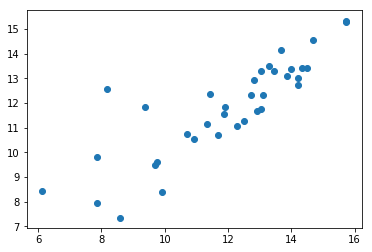

In [31]:
#plt.scatter(np.log1p(y_test),np.log1p(y_pred))
plt.scatter(y_test,y_pred)

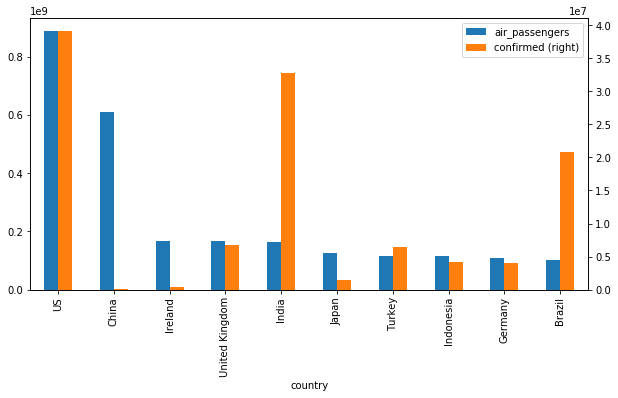

In [32]:
temp=df.sort_values(['air_passengers'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= ['air_passengers','confirmed'], secondary_y='confirmed', kind = 'bar',  ax = ax)         

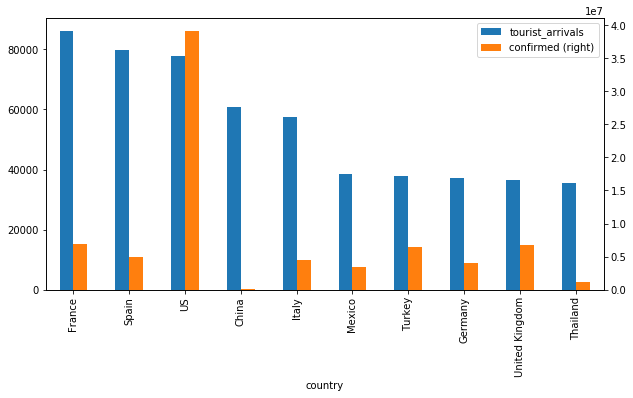

In [33]:
temp=df.sort_values(['tourist_arrivals'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= ['tourist_arrivals','confirmed'], secondary_y='confirmed', kind = 'bar',  ax = ax)   

# Interpret Model and Visualization

In [39]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1201263687, splitter='best')

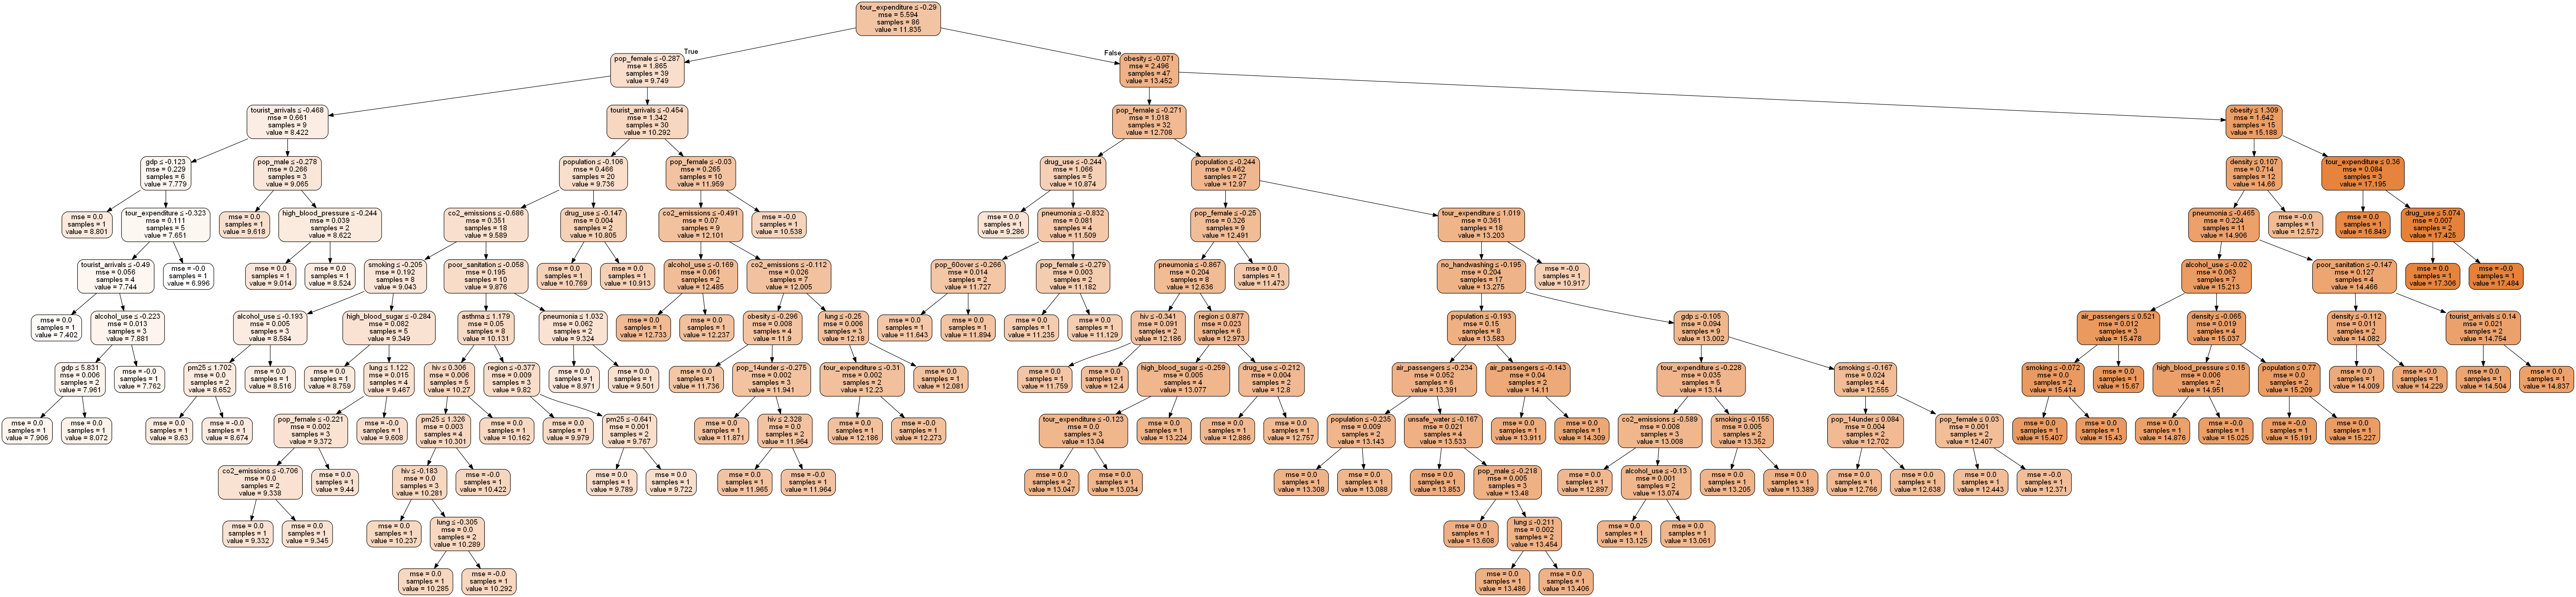

In [44]:
#!pip3 install pydotplus --no-cache-dir --no-binary :all:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [45]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1201263687, splitter='best')

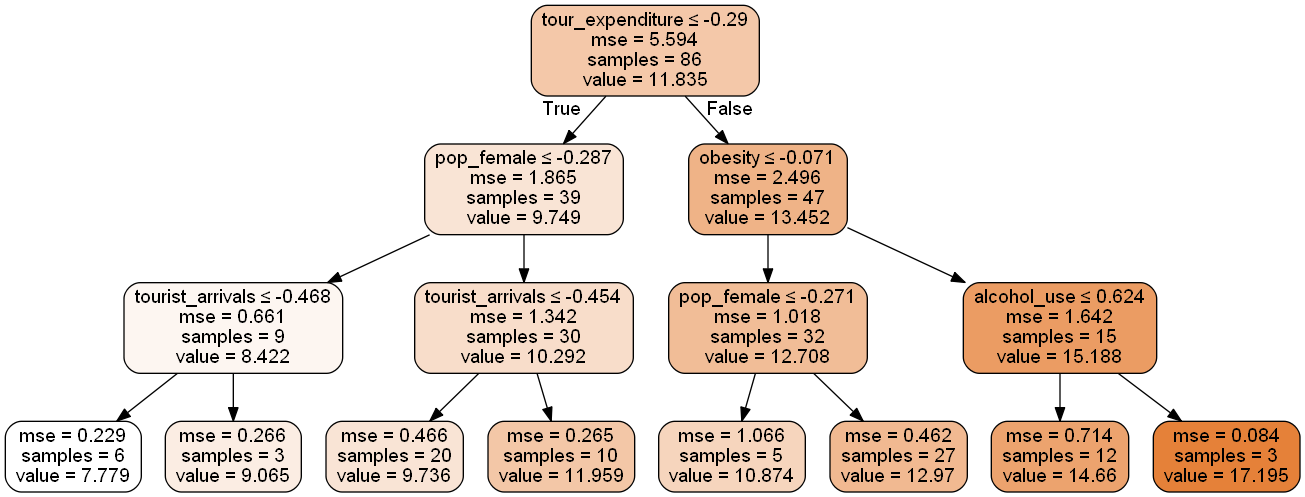

In [46]:
#!pip3 install pydotplus --no-cache-dir --no-binary :all:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Find the best parameter

In [47]:
# setting the static parameters
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

parameters = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rfr, parameters, cv = 3, n_jobs = -1, verbose = 1)
grid.fit(X,y)
grid.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   12.2s finished


{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 50}